<a href="https://colab.research.google.com/github/anthonymelson/portfolio/blob/master/Building_and_Testing_a_Regularized_Regression_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [0]:
# Data Manipulation
import numpy as np
import pandas as pd

# Create and Split Data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Notebook Styling
%matplotlib inline
plt.style.use('fivethirtyeight')

# Create a Regressor Class
For those interested in how regression, gradient descent, and regularization work or can be written in python, this section will be helpful.  Otherwise, it is best to browse it and move down to regularization strength.

This regressor class implements L2 regularization with gradient descent for linear regression problems.  It also has several callable methods (score_mse, predict, get_coefficients, and params) that can be called from any model object.  

Many tweaks would need to be made for it to be "deployment ready".  It needs several small changes like accounting for a constant, terminating based on a precision term, and offering L1 regularization along with several larger changes (all relating to efficiency).  That aside, it works very well in its purpose and is well built for experimental and learning purposes.

The goal will be to use this regressor class to show how regularization works, and how well it performs on a four toy datasets with varying relevant characteristcs (i.e. noise and uninformative features).

In [0]:
class regularized_regression():
  import numpy as np
  def __init__(self, l2 = "none", iterations = 25000, learning_rate = 0.0005):
    self.x = x
    self.y = y
    self.learning_rate = learning_rate
    self.l2 = l2
    self.iterations = iterations
    self.m = np.shape(x)[0]
    self.n = np.shape(x)[1]
    self.theta = np.ones(self.n)


  """
  fit: This method fits a model withor without L2 regularization (l2).  In this 
  implementation, higher numbers mean stronger regularization (a higher penalty
  for complexity).
  """

  def fit(self, x, y):
    theta = self.theta
    n = self.n
    m = self.m
    l2 = self.l2
    learning_rate = self.learning_rate
    theta = self.theta
    for i in range(self.iterations):
      prediction = np.dot(x, theta)
      loss = prediction - y 
      gradient = (np.dot(x.transpose(), loss) / m)
      
      if l2 == "none" or l2 == 0:
          theta = theta - gradient * learning_rate
      else:        
          for j in range(len(theta)):
              theta[j] = theta[j] - (learning_rate * (gradient[j] - l2*theta[j]))
    self.theta = theta
    return 


  """
  predict: Returns prediction of fitted model (array of wieghts) for input 
  feature vector (x).
  """

  def predict(self, x):
    prediction = np.dot(x, self.theta)
    return prediction


  """
  score_mse: Scores regression accuracy with mean-squared-error (MSE), a
  standard measure of regression accuracy.
  """

  def score_mse(self, x, y):
    pred = np.dot(x, self.theta)
    score = (np.sum(pred - y)**2) / (2*len(x))
    return score


  """
  get_coefficients: This method extracts the coefficients wieghts (theta) which
  make up the fitted model as a list.
  """

  def get_coefficients(self):
    return self.theta


  """
  params: This method returns the parameters (attributes) of the 
  regularized_regression class object as a dictionary.
  """

  def params(self):
    params = {'Iterations': self.iterations,
              'Learning Rate': self.learning_rate,
              'l2': self.l2,
              'Samples': self.m,
              'Features': self.n
    }
    return params

# Build Functions for Experimentation

Below is a function that uses the regressor object from regularized_regression to build 10 models with varying strengths of regularization (0.0 to 1.0), and collects training scores, test scores, regularization strenght, and coefficients (final model weights).  It then outputs them as lists.

In [0]:
def fit_models(x_train, y_train, x_test, y_test):

  reg_range = np.arange(0.00, 0.10, 0.01)
  test_scores = []
  train_scores = []
  regularization = []
  coefficients = []

  for i in reg_range:

    model = regularized_regression(l2=i)
    model.fit(x_train,y_train) 

    test_score = model.score_mse(x_test, y_test)
    train_score = model.score_mse(x_train, y_train)
    coefficient = model.get_coefficients()
    reg = i
    
    regularization.append(i)
    test_scores.append(test_score)
    train_scores.append(train_score)
    coefficients.append(coefficient)

  return regularization, test_scores, train_scores, coefficients

This function turns the lists from fit_models into pandas dataframes to make them easier to plot.

In [0]:
def create_df(regularizaion, test_scores, train_scores):
  df = pd.DataFrame(regularization, columns=['Regularization Strength'])
  df['Train Scores'] = train_scores
  df['Test Scores'] = test_scores
  return df

This function plots the information dataframes from create_df.  Specifically, it plots the training and test scores of 10 models against their regularization strength (between 0 and 0.1).

In [0]:
def plot_reg_score(df):
  plt.figure()
  plt.plot(regularization, test_scores, label='Test Scores')
  plt.plot(regularization, train_scores, label='Train Scores')
  plt.xlabel("Regularization Strength", fontsize=18)
  plt.ylabel("MSE", fontsize=18)
  plt.legend()
  return plt.show()

# Regularization Strength, Uninformative Features, and Noise

In the following, the training and test scores will be plotted against regularization strengths between 0.0 and 0.1 (where higher is stronger).  This will be done with four toy datasets that have varying amounts of informative (relevant features, uniformative (irrelevant) features, and amounts of noise (random variation).

Since the basic premise behind regularization is that it stops overfitting (which is more common when there are more uninformative features and/or noise in the dataset), this test will provide insight into the power of regularization and the types of situations it is useful in.  

The expectation is that stronger regularization will benefit the bias-variance trade-off (test set and training set scores) when there are more uninformative features and/or noise.

## Test on Dataset 1

Samples: 4000

Features: 15

Informative: 5

Noise: 10

In [0]:
x, y, coef = make_regression(n_samples=4000, n_features=15, n_informative=5, noise=10, coef=True, random_state=74)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=68)

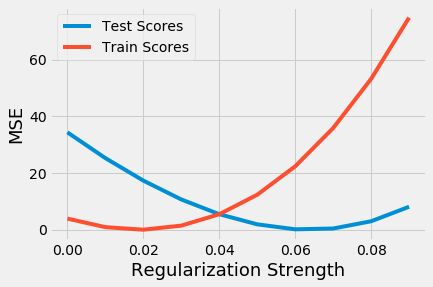

In [34]:
regularization, test_scores, train_scores, coefficients = fit_models(x_train, y_train, x_test, y_test)
df = create_df(regularization, test_scores, train_scores)
plot_reg_score(df)

The appropriate trade-off point is at 0.04 and the optimums are at 0.02 and 0.06 for bias and variance respectively.  This regularization is fairly strong and dovetails with expectations, as noise is high and most features are uninformative.

## Test on Dataset 2

Samples: 4000

Features: 15

Informative: 5

Noise: 5

In [0]:
x, y, coef = make_regression(n_samples=4000, n_features=15, n_informative=5, noise=5, coef=True, random_state=74)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=68)

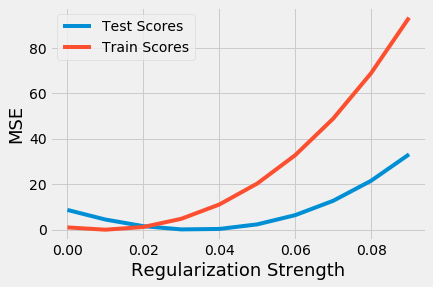

In [36]:
regularization, test_scores, train_scores, coefficients = fit_models(x_train, y_train, x_test, y_test)
df = create_df(regularization, test_scores, train_scores)
plot_reg_score(df)

The appropriate trade-off point is at 0.02 and the optimums are at 0.00 and 0.04 for bias and variance respectively.  Regularization is weaker than it was previously, but still fairly strong, which again dovetails with expectations.

## Test on Dataset 3

Samples: 4000

Features: 5

Informative: 5

Noise: 2

In [0]:
x, y, coef = make_regression(n_samples=4000, n_features=5, n_informative=5, noise=2, coef=True, random_state=74)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=68)

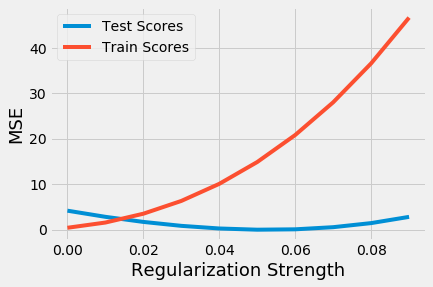

In [38]:
regularization, test_scores, train_scores, coefficients = fit_models(x_train, y_train, x_test, y_test)
df = create_df(regularization, test_scores, train_scores)
plot_reg_score(df)

The appropriate trade-off point is near 0.01 and the optimums are at 0.00 and 0.045 for bias and variance respectively.  The trade-off point is lower, as was expected.  Though it is a little surprising that the optimum for the test_score is slightly higher than before.

## Test on Dataset 4

Samples: 4000

Features: 5

Informative: 5

Noise: 0

In [0]:
x, y, coef = make_regression(n_samples=4000, n_features=5, n_informative=5, noise=0, coef=True, random_state=74)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=68)

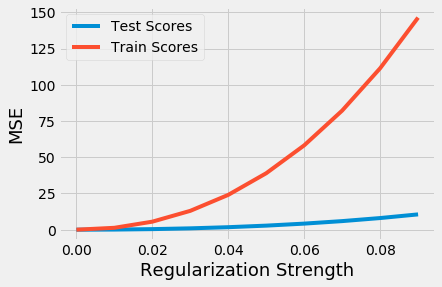

In [40]:
regularization, test_scores, train_scores, coefficients = fit_models(x_train, y_train, x_test, y_test)
df = create_df(regularization, test_scores, train_scores)
plot_reg_score(df)

The appropriate trade-off point is at 0.00 (no regularization), and the optimums are identical (0 and 0).  Since there isn't any noise and there are no uninformative features, this result is as expected.  Hence, this is not a situation where regularization help, but rather hurts.